Importing required packages

In [ ]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=e4bc8381795260766c41ff11400cc9ae472893cc67c1cae1e3fff72bbb4988ef
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

Mounted Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importing Dataset

In [ ]:
# Read the datasets into dataframes
energy =pd.read_csv("/content/data_application_energy.csv",parse_dates=['date'])
energy.shape

(19735, 29)

In [ ]:
energy_1=energy
energy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
#setting the date index
energy = energy.set_index('date')

In [ ]:
energy['month'] = energy.index.month
energy['weekday'] = energy.index.weekday
energy['hour'] = energy.index.hour
energy['week'] = energy.index.week

In [ ]:
energy.head(10)

Appliances  lights         T1       RH_1     T2  \
date                                                                   
2016-01-11 17:00:00          60      30  19.890000  47.596667  19.20   
2016-01-11 17:10:00          60      30  19.890000  46.693333  19.20   
2016-01-11 17:20:00          50      30  19.890000  46.300000  19.20   
2016-01-11 17:30:00          50      40  19.890000  46.066667  19.20   
2016-01-11 17:40:00          60      40  19.890000  46.333333  19.20   
2016-01-11 17:50:00          50      40  19.890000  46.026667  19.20   
2016-01-11 18:00:00          60      50  19.890000  45.766667  19.20   
2016-01-11 18:10:00          60      50  19.856667  45.560000  19.20   
2016-01-11 18:20:00          60      40  19.790000  45.597500  19.20   
2016-01-11 18:30:00          70      40  19.856667  46.090000  19.23   

                          RH_2     T3       RH_3         T4       RH_4  ...  \
date                                                                    ...   
2016-01-11 17:00:00  44.790000  19.79  44.730000  19.000000  45.566667  ...   
2016-01-11 17:10:00  44.722500  19.79  44.790000  19.000000  45.992500  ...   
2016-01-11 17:20:00  44.626667  19.79  44.933333  18.926667  45.890000  ...   
2016-01-11 17:30:00  44.590000  19.79  45.000000  18.890000  45.723333  ...   
2016-01-11 17:40:00  44.530000  19.79  45.000000  18.890000  45.530000  ...   
2016-01-11 17:50:00  44.500000  19.79  44.933333  18.890000  45.730000  ...   
2016-01-11 18:00:00  44.500000  19.79  44.900000  18.890000  45.790000  ...   
2016-01-11 18:10:00  44.500000  19.73  44.900000  18.890000  45.863333  ...   
2016-01-11 18:20:00  44.433333  19.73  44.790000  18.890000  45.790000  ...   
2016-01-11 18:30:00  44.400000  19.79  44.863333  18.890000  46.096667  ...   

                        RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
date                                                                          
2016-01-11 17:00:00  92.000000   7.000000   63.000000   5.300000  13.275433   
2016-01-11 17:10:00  92.000000   6.666667   59.166667   5.200000  18.606195   
2016-01-11 17:20:00  92.000000   6.333333   55.333333   5.100000  28.642668   
2016-01-11 17:30:00  92.000000   6.000000   51.500000   5.000000  45.410389   
2016-01-11 17:40:00  92.000000   5.666667   47.666667   4.900000  10.084097   
2016-01-11 17:50:00  92.000000   5.333333   43.833333   4.800000  44.919484   
2016-01-11 18:00:00  92.000000   5.000000   40.000000   4.700000  47.233763   
2016-01-11 18:10:00  91.833333   5.166667   40.000000   4.683333  33.039890   
2016-01-11 18:20:00  91.666667   5.333333   40.000000   4.666667  31.455702   
2016-01-11 18:30:00  91.500000   5.500000   40.000000   4.650000   3.089314   

                           rv2  month  weekday  hour  week  
date                                                        
2016-01-11 17:00:00  13.275433      1        0    17     2  
2016-01-11 17:10:00  18.606195      1        0    17     2  
2016-01-11 17:20:00  28.642668      1        0    17     2  
2016-01-11 17:30:00  45.410389      1        0    17     2  
2016-01-11 17:40:00  10.084097      1        0    17     2  
2016-01-11 17:50:00  44.919484      1        0    17     2  
2016-01-11 18:00:00  47.233763      1        0    18     2  
2016-01-11 18:10:00  33.039890      1        0    18     2  
2016-01-11 18:20:00  31.455702      1        0    18     2  
2016-01-11 18:30:00   3.089314      1        0    18     2  

[10 rows x 32 columns]

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [ ]:
energy.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...        RH_out     Windspeed    Visibility     Tdewpoint  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     79.750418      4.039752     38.330834      3.760707   
std    ...     14.901088      2.451221     11.794719      4.194648   
min    ...     24.000000      0.000000      1.000000     -6.600000   
25%    ...     70.333333      2.000000     29.000000      0.900000   
50%    ...     83.666667      3.666667     40.000000      3.433333   
75%    ...     91.666667      5.500000     40.000000      6.566667   
max    ...    100.000000     14.000000     66.000000     15.500000   

                rv1           rv2         month       weekday          hour  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      24.988033     24.988033      3.101647      2.977249     11.502002   
std       14.496634     14.496634      1.339200      1.985617      6.921953   
min        0.005322      0.005322      1.000000      0.000000      0.000000   
25%       12.497889     12.497889      2.000000      1.000000      6.000000   
50%       24.897653     24.897653      3.000000      3.000000     12.000000   
75%       37.583769     37.583769      4.000000      5.000000     17.000000   
max       49.996530     49.996530      5.000000      6.000000     23.000000   

               week  
count  19735.000000  
mean      11.393615  
std        5.657985  
min        2.000000  
25%        6.000000  
50%       11.000000  
75%       16.000000  
max       21.000000  

[8 rows x 32 columns]

In [ ]:
energy.shape

(19735, 32)

Checeking for NA

In [ ]:
energy.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
month          0
weekday        0
hour           0
week           0
dtype: int64

Data_Visualisation

In [ ]:
# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= energy_1.date  ,  mode = "lines", y = energy_1.Appliances)
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

Adding column to mark weekdays (0) and weekends(1) for time series evaluation

In [ ]:
energy_1['WEEKDAY'] = ((pd.to_datetime(energy_1['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
energy_1['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [ ]:
# Find rows with weekday 
t_weekday =  energy_1[energy_1['WEEKDAY'] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= t_weekday.date  ,  mode = "lines", y = t_weekday.Appliances )
layout = go.Layout(title = 'Appliance Energy Consumption Measurement on Weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [ ]:
t_weekend =  energy_1[energy_1 ['WEEKDAY'] == 1]

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= t_weekend.date  ,  mode = "lines", y = t_weekend.Appliances )
layout = go.Layout(title = 'Appliance Energy Consumption Measurement on Weekends' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [ ]:
# Functions to be used from the plots

def daily(x,df=energy):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=energy):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=energy):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

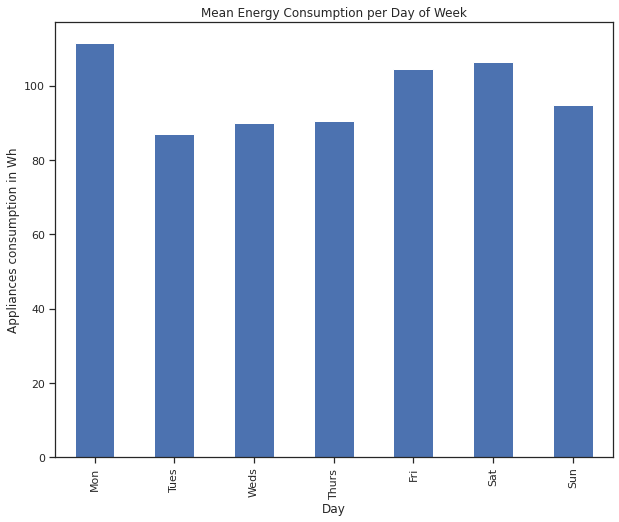

In [ ]:
# Plot of Mean Energy Consumption per Day of Week
daily('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

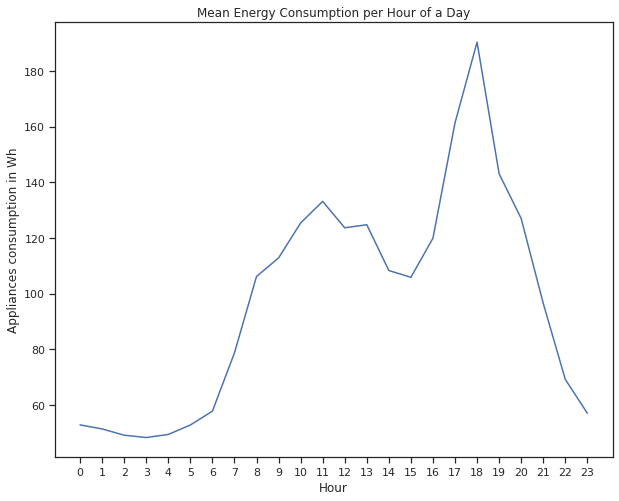

In [ ]:
# Plot of Mean Energy Consumption per Hour of a Day

hourly('Appliances').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

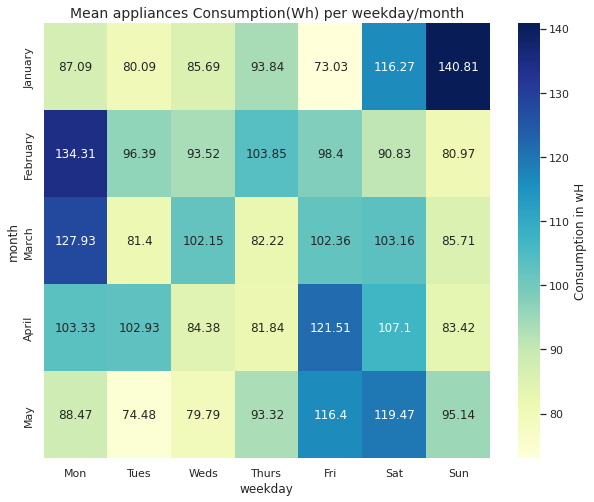

In [ ]:
# Heatmap: Mean consumption per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Appliances').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

The number of the 0,1% top values of appliances' load is 19 and they have power load higher than 790 Wh.


Text(0.5, 1.0, 'Appliances energy consumption distribution')

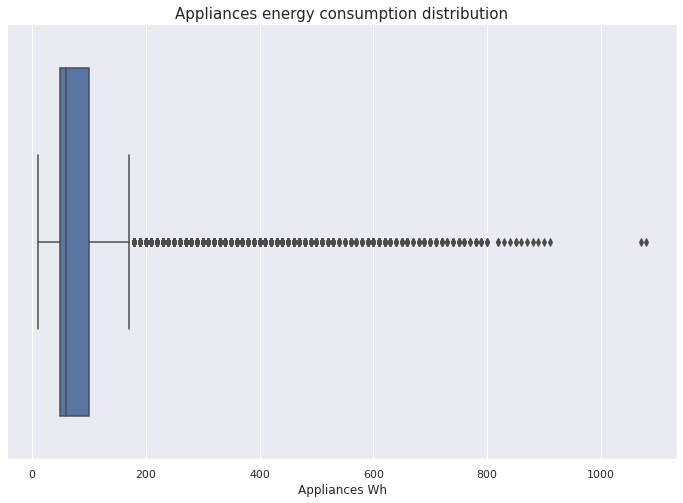

In [ ]:
# Find outliers
sorted_appliances = energy.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")

# boxplot appliances
plt.figure(figsize=(12,8))
sns.boxplot(x="Appliances", data=energy)
plt.xlabel('Appliances Wh', fontsize=12)
plt.title("Appliances energy consumption distribution", fontsize=15)

In [ ]:
# Outliers removal
energy_a = energy.drop(energy[(energy.Appliances>790)|(energy.Appliances<0)].index)
energy_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [ ]:
energy_a=energy_a.drop("month",axis=1)
energy_a=energy_a.drop("weekday",axis=1)
energy_a=energy_a.drop("week",axis=1)

In [ ]:
energy_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

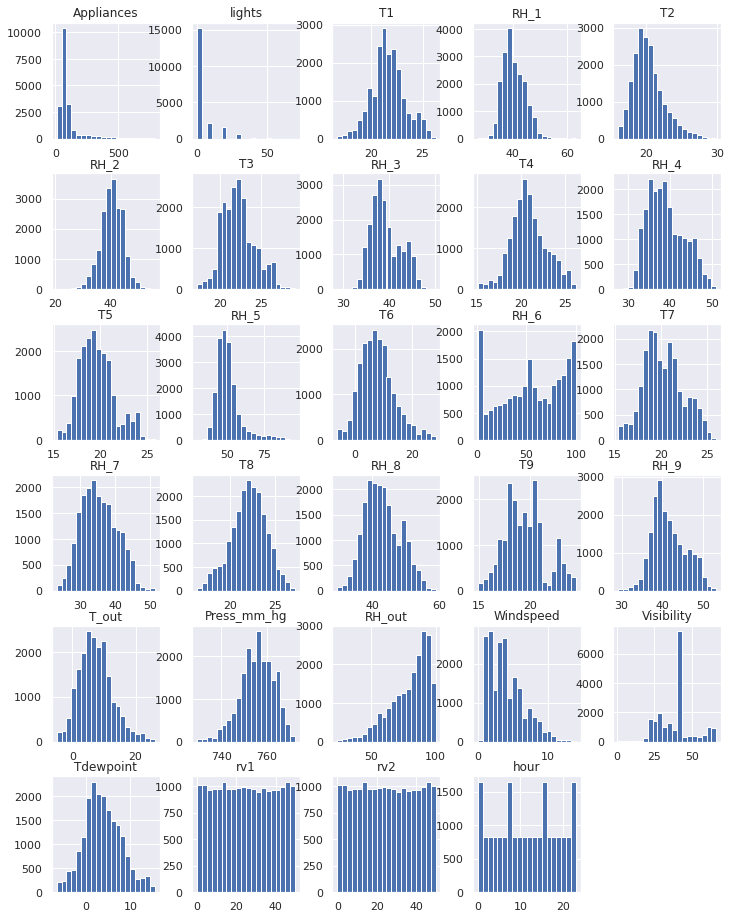

In [ ]:

# Histogram of all the features to understand the distribution
energy_a.hist(bins = 20 , figsize= (12,16)) ;

In [ ]:
energy_a['log_appliances'] = np.log(energy_a.Appliances) 

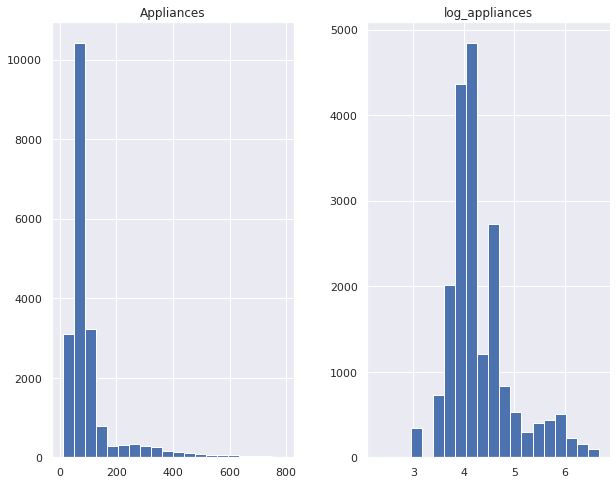

In [ ]:
appliance = ["Appliances","log_appliances"]
appliance=energy_a[appliance]
appliance.hist(bins = 20 ) ;

In [ ]:
# finding correlatin matrix of all the attributes
energy_a.corr()

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances        1.000000  0.198201  0.058996  0.087890  0.122590 -0.058680   
lights            0.198201  1.000000 -0.022727  0.107266 -0.004990  0.051428   
T1                0.058996 -0.022727  1.000000  0.163976  0.836827 -0.002565   
RH_1              0.087890  0.107266  0.163976  1.000000  0.269801  0.797675   
T2                0.122590 -0.004990  0.836827  0.269801  1.000000 -0.165586   
RH_2             -0.058680  0.051428 -0.002565  0.797675 -0.165586  1.000000   
T3                0.088211 -0.096397  0.892423  0.253182  0.735194  0.137318   
RH_3              0.037644  0.131253 -0.028357  0.844803  0.121740  0.678418   
T4                0.043280 -0.008049  0.876984  0.105981  0.761939 -0.047445   
RH_4              0.017365  0.115113  0.098001  0.880435  0.231678  0.721560   
T5                0.023048 -0.078044  0.885198  0.205852  0.720483  0.110415   
RH_5              0.010296  0.141706 -0.014878  0.303246  0.029624  0.250066   
T6                0.121284 -0.078204  0.654770  0.315978  0.801244 -0.009877   
RH_6             -0.086414  0.152968 -0.614825  0.245514 -0.580134  0.390321   
T7                0.028316 -0.134699  0.838569  0.021305  0.663438 -0.051459   
RH_7             -0.055987  0.035323  0.135179  0.801155  0.229214  0.690644   
T8                0.042690 -0.070743  0.825418 -0.030178  0.578085 -0.041179   
RH_8             -0.095707  0.012999 -0.006212  0.736238  0.068684  0.679836   
T9                0.012986 -0.156734  0.844707  0.115160  0.675357  0.054441   
RH_9             -0.052405 -0.008539  0.071834  0.763981  0.157388  0.676492   
T_out             0.102671 -0.073683  0.682862  0.340586  0.792340  0.033439   
Press_mm_hg      -0.039059 -0.011491 -0.149993 -0.293908 -0.132719 -0.255419   
RH_out           -0.155689  0.068215 -0.345160  0.274344 -0.505242  0.585199   
Windspeed         0.090528  0.060741 -0.087680  0.204946  0.052724  0.068929   
Visibility       -0.004157  0.019347 -0.075679 -0.020756 -0.069587 -0.004746   
Tdewpoint         0.017180 -0.035632  0.571435  0.639078  0.582594  0.499169   
rv1              -0.012404  0.000627 -0.006107 -0.000530 -0.010844  0.006183   
rv2              -0.012404  0.000627 -0.006107 -0.000530 -0.010844  0.006183   
hour              0.219468  0.255219  0.178995  0.018695  0.254971 -0.183140   
log_appliances    0.904056  0.261356  0.162862  0.084759  0.215863 -0.092709   

                      T3      RH_3        T4      RH_4  ...     T_out  \
Appliances      0.088211  0.037644  0.043280  0.017365  ...  0.102671   
lights         -0.096397  0.131253 -0.008049  0.115113  ... -0.073683   
T1              0.892423 -0.028357  0.876984  0.098001  ...  0.682862   
RH_1            0.253182  0.844803  0.105981  0.880435  ...  0.340586   
T2              0.735194  0.121740  0.761939  0.231678  ...  0.792340   
RH_2            0.137318  0.678418 -0.047445  0.721560  ...  0.033439   
T3              1.000000 -0.011087  0.852852  0.122852  ...  0.699277   
RH_3           -0.011087  1.000000 -0.140469  0.899024  ...  0.118229   
T4              0.852852 -0.140469  1.000000 -0.048743  ...  0.663333   
RH_4            0.122852  0.899024 -0.048743  1.000000  ...  0.293228   
T5              0.888290 -0.049798  0.871788  0.092013  ...  0.651258   
RH_5           -0.066456  0.375362 -0.076681  0.352554  ... -0.053278   
T6              0.686719  0.076876  0.652214  0.258969  ...  0.974785   
RH_6           -0.647328  0.515124 -0.703042  0.392502  ... -0.641336   
T7              0.847395 -0.249982  0.877688 -0.131189  ...  0.631239   
RH_7            0.172636  0.832711  0.043341  0.894280  ...  0.294046   
T8              0.795284 -0.283091  0.796220 -0.167019  ...  0.502703   
RH_8            0.044632  0.828808 -0.095246  0.847208  ...  0.116979   
T9              0.901417 -0.195199  0.889383 -0.044528  ...  0.668082   
RH_9            0.134633  0.833593 -0.025754  0.856563  ...  0.223017   
T_

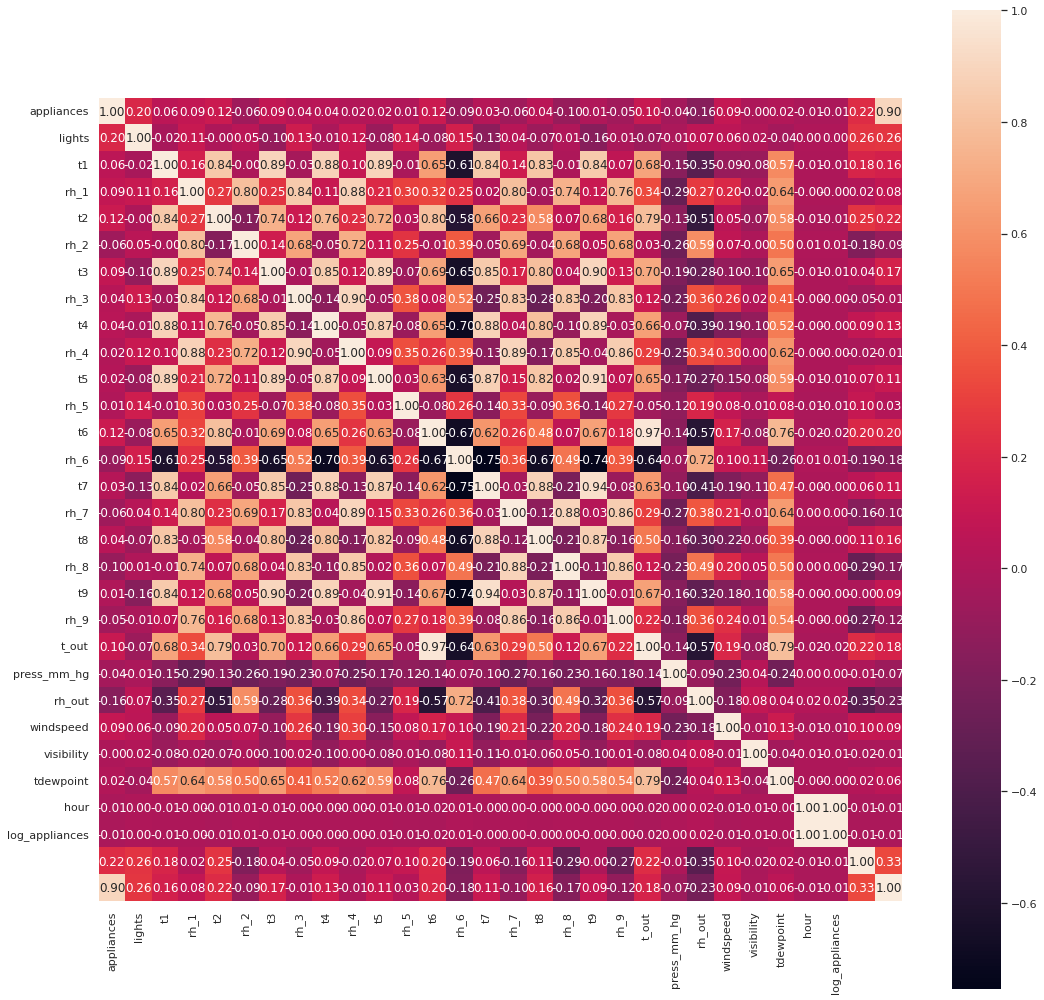

In [ ]:
#Ploting correlation matrix
col = ['appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint','hour','log_appliances']
corr=energy_a.corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

Checeking for Multicollinearity

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(energy, 40))

Top Absolute Correlations
rv1    rv2      1.000000
month  week     0.977385
T6     T_out    0.974787
T7     T9       0.944776
T5     T9       0.911055
T3     T9       0.901324
RH_3   RH_4     0.898978
RH_4   RH_7     0.894301
T1     T3       0.892402
T9     month    0.890605
T4     T9       0.889439
T9     week     0.888777
T3     T5       0.888169
T1     T5       0.885247
RH_7   RH_8     0.883984
T7     T8       0.882123
RH_1   RH_4     0.880359
T4     T7       0.877763
T1     T4       0.877001
T4     T5       0.871813
T5     T7       0.870624
T8     T9       0.869338
RH_7   RH_9     0.858686
RH_4   RH_9     0.856591
RH_8   RH_9     0.855812
T3     T4       0.852778
       T7       0.847374
RH_4   RH_8     0.847259
T1     T9       0.844777
RH_1   RH_3     0.844677
T1     T7       0.838705
       T2       0.836834
T7     week     0.835119
RH_3   RH_9     0.833538
T7     month    0.833005
RH_3   RH_7     0.832685
       RH_8     0.828822
T1     T8       0.825413
T5     T8       0.824981

In [ ]:
energy_a[energy_a.columns[:]].corr()['log_appliances'][:]

Appliances        0.904056
lights            0.261356
T1                0.162862
RH_1              0.084759
T2                0.215863
RH_2             -0.092709
T3                0.168772
RH_3             -0.006320
T4                0.134139
RH_4             -0.006633
T5                0.112171
RH_5              0.025979
T6                0.198031
RH_6             -0.175739
T7                0.112015
RH_7             -0.096342
T8                0.155901
RH_8             -0.166129
T9                0.094428
RH_9             -0.116199
T_out             0.177690
Press_mm_hg      -0.074650
RH_out           -0.227358
Windspeed         0.088812
Visibility       -0.013125
Tdewpoint         0.057205
rv1              -0.010784
rv2              -0.010784
hour              0.334117
log_appliances    1.000000
Name: log_appliances, dtype: float64

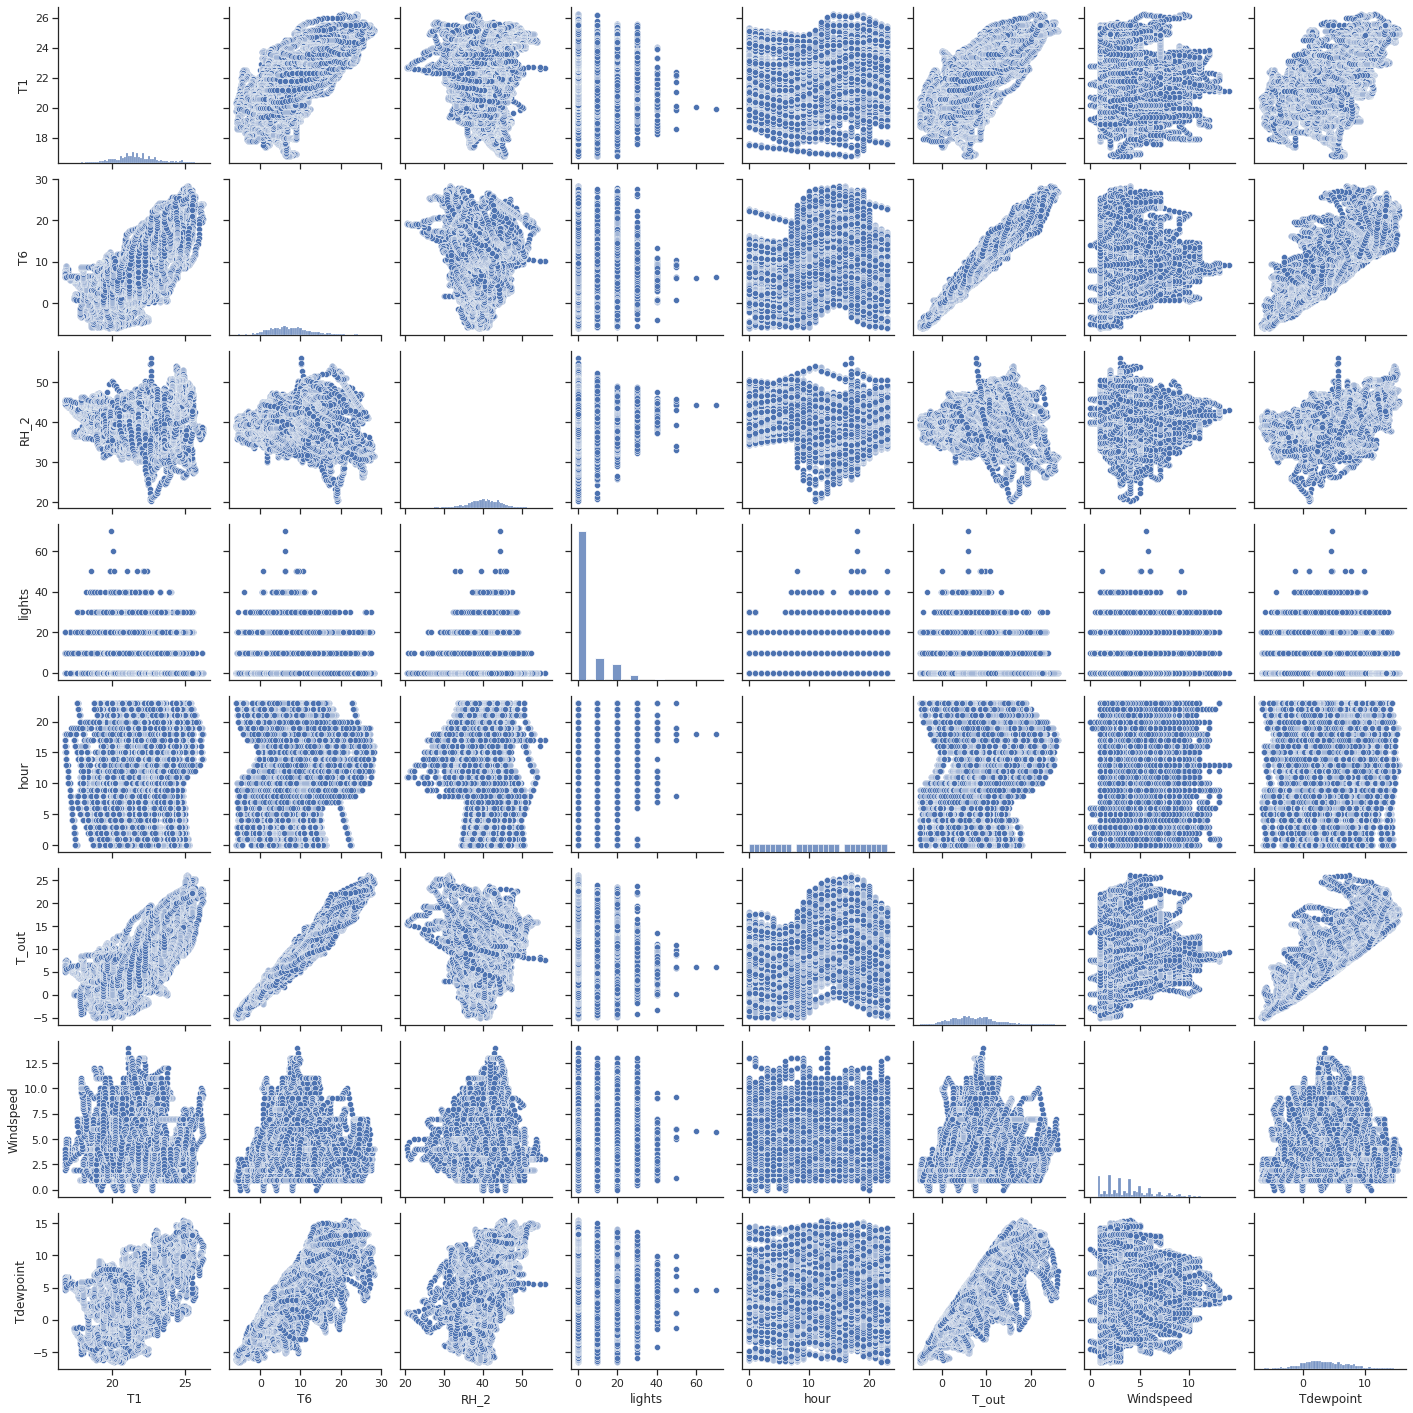

In [ ]:
col = ["T1",'T6','RH_2','lights','hour','T_out','Windspeed','Tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_a[col])
plt.show();

Column Management

In [ ]:
temperature = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
humidity = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
light = ["lights"]
hour=["hour"]
random = ["rv1", "rv2"]
appliance_1 = ["log_appliances"]
appliance_2 = ["Appliances"]
App_class= ["Appliance_Class"]

In [ ]:
feature_a=["T1","T2","T3","T4","T5","T6","RH_1","RH_2","RH_3","RH_5","RH_6",
          "Tdewpoint","RH_out","Press_mm_hg","Windspeed","lights"]
feature_1=energy_a[feature_a]
target_1=energy_a[appliance_1]

In [ ]:
feature_1.head()

T1    T2     T3         T4         T5        T6  \
date                                                                      
2016-01-11 17:00:00  19.89  19.2  19.79  19.000000  17.166667  7.026667   
2016-01-11 17:10:00  19.89  19.2  19.79  19.000000  17.166667  6.833333   
2016-01-11 17:20:00  19.89  19.2  19.79  18.926667  17.166667  6.560000   
2016-01-11 17:30:00  19.89  19.2  19.79  18.890000  17.166667  6.433333   
2016-01-11 17:40:00  19.89  19.2  19.79  18.890000  17.200000  6.366667   

                          RH_1       RH_2       RH_3   RH_5       RH_6  \
date                                                                     
2016-01-11 17:00:00  47.596667  44.790000  44.730000  55.20  84.256667   
2016-01-11 17:10:00  46.693333  44.722500  44.790000  55.20  84.063333   
2016-01-11 17:20:00  46.300000  44.626667  44.933333  55.09  83.156667   
2016-01-11 17:30:00  46.066667  44.590000  45.000000  55.09  83.423333   
2016-01-11 17:40:00  46.333333  44.530000  45.000000  55.09  84.893333   

                     Tdewpoint  RH_out  Press_mm_hg  Windspeed  lights  
date                                                                    
2016-01-11 17:00:00        5.3    92.0        733.5   7.000000      30  
2016-01-11 17:10:00        5.2    92.0        733.6   6.666667      30  
2016-01-11 17:20:00        5.1    92.0        733.7   6.333333      30  
2016-01-11 17:30:00        5.0    92.0        733.8   6.000000      40  
2016-01-11 17:40:00        4.9    92.0        733.9   5.666667      40

Experiment_1

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(feature_1, target_1, test_size = 0.2, random_state = 0)

Scaling

In [ ]:
scaler = StandardScaler() 
  
# To scale data 
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)
y1_train = scaler.fit_transform(y1_train)
y1_test=scaler.transform(y1_test)

Cost Function

In [ ]:
def costFunction(dataFile, dataTarget, coeffMatrix):
    dataLength = len(dataFile);
    costValue = np.sum(((dataFile.dot(coeffMatrix.T)) - dataTarget) ** 2) / (2 * dataLength);
    return costValue;

Gradient Descent Function for fixed threshold

In [ ]:
def gradientDescent(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list1=[0.0000001]; #threshold level
    cost1 = []
    for k in list1:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
 

linear regression function for Different Learning rate

In [ ]:
def developLinearModel(dataFile, dataTarget):
    list2=[0.2,0.1,0.01,0.05,0.001,0.005,0.0001,0.0005];
    for learning_rate in list2:
        coeffMatrix = np.zeros((1, len(dataFile[0])));
        print(coeffMatrix);
        print();
        initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
        print('Initial Cost: ', initialCost, '\n');
        coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix, learning_rate, 50000);
    return coeffMatrix;

predict

In [ ]:
def predict(testData, coeffMatrix):
    predictedTarget = testData.dot(coeffMatrix.T);
    return predictedTarget;

MSE

In [ ]:
def calculateMSE(testTarget, predictedTarget):
    modelRMSE = (sum((testTarget - predictedTarget) ** 2) / len(testTarget));
    return modelRMSE;

R-Square

In [ ]:
def modelRSquared(testTarget, predictedTarget):
    targetMean = np.mean(testTarget);
    totalSSE = np.sum((testTarget - targetMean) ** 2);
    residualSSE = np.sum((testTarget - predictedTarget) ** 2);
    rSquared = 1 - (residualSSE / totalSSE);
    return rSquared;

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 998 

Model Cost:  0.3915503298070015 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.2


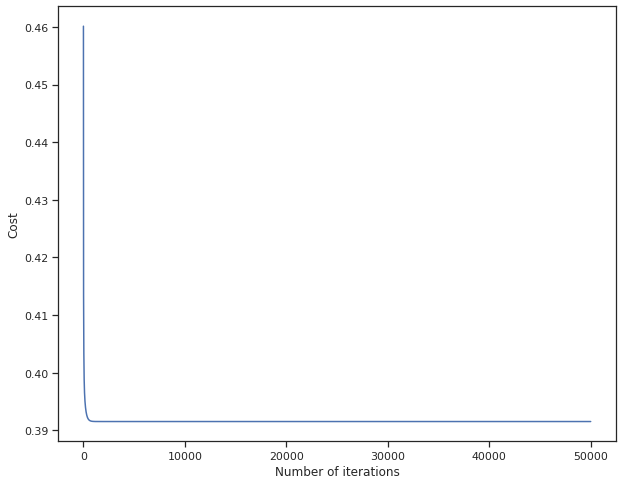

In [ ]:
#Model Training for Alpha = 0.2
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;
linearModel_tr1= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 1778 

Model Cost:  0.39156624457463546 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.1


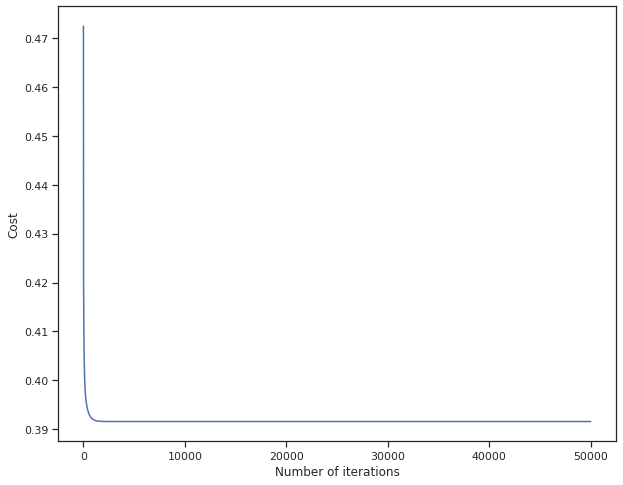

In [ ]:
#Model Training for Alpha = 0.1
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.1, 50000);
    return coeffMatrix;
linearModel_tr2= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 10500 

Model Cost:  0.39185096382852497 

Model Coefficients: 
[[ 0.31460127 -0.4550414   0.36476423 -0.20423496 -0.09201412  0.29560832
   0.78124522 -0.61658773 -0.17222995  0.04141765 -0.02865177 -0.2950313
   0.03467944 -0.03131468  0.02511227  0.27005771]]
alpha: 0.01


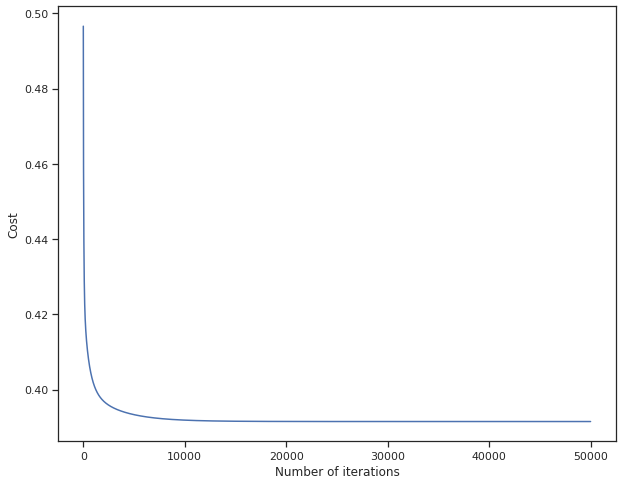

In [ ]:
#Model Training for Alpha = 0.01
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.01, 50000);
    return coeffMatrix;
linearModel_tr3= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 3117 

Model Cost:  0.3915980825119031 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.05


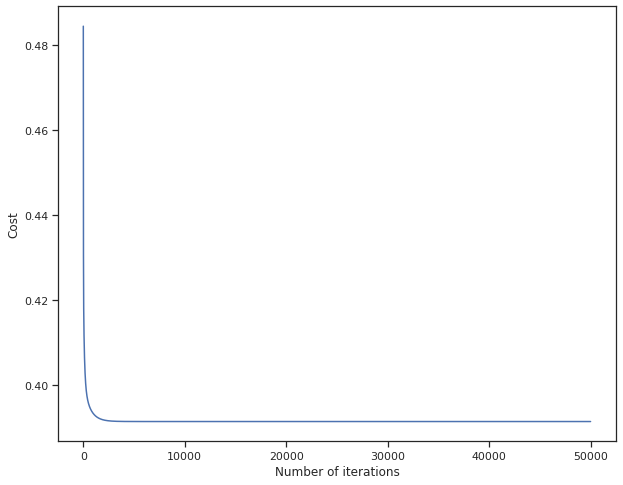

In [ ]:
#Model Training for Alpha = 0.05
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.05, 50000);
    return coeffMatrix;
linearModel_tr4= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 16651 

Model Cost:  0.3921646375868704 

Model Coefficients: 
[[ 0.30708086 -0.44361506  0.36599764 -0.20482396 -0.09265006  0.28756053
   0.77434995 -0.60828837 -0.17355581  0.04128123 -0.02871684 -0.29035589
   0.03050092 -0.03148079  0.02495943  0.27034679]]
alpha: 0.005


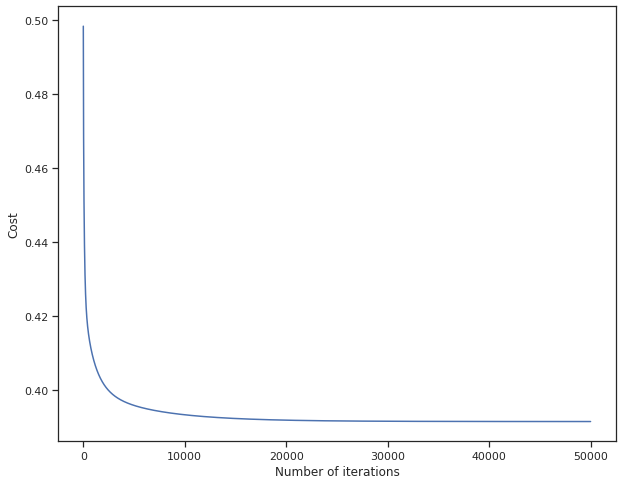

In [ ]:
#Model Training for Alpha = 0.005
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.005, 50000);
    return coeffMatrix;
linearModel_tr5= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-07 

Cost Function converges at 941 

Model Cost:  0.3638382784254004 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.2


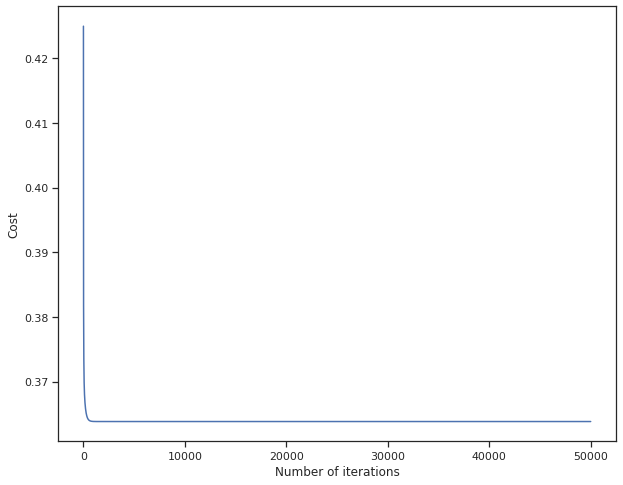

In [ ]:
#Model testing for Alpha = 0.2
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;

linearModel_te1 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-07 

Cost Function converges at 1673 

Model Cost:  0.3638535371842082 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.1


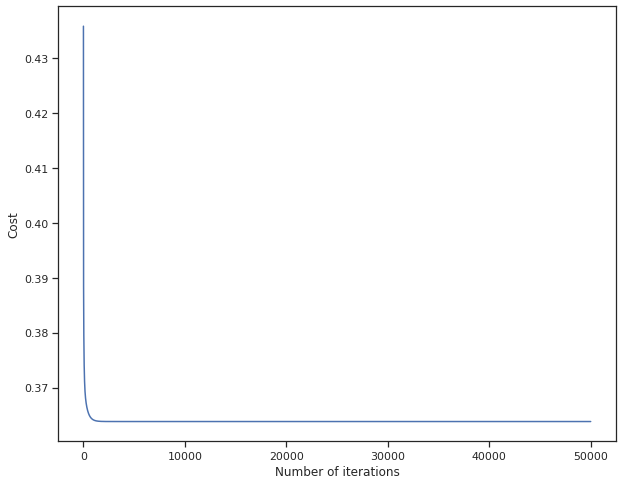

In [ ]:
#Model testing for Alpha = 0.1
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.1, 50000);
    return coeffMatrix;

linearModel_te2 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-07 

Cost Function converges at 9792 

Model Cost:  0.36412512588555024 

Model Coefficients: 
[[ 0.34909589 -0.46777544  0.30898788 -0.19584919 -0.11075466  0.28650554
   0.66469354 -0.52551411 -0.14150392  0.05044652 -0.07243533 -0.23809165
   0.00859311 -0.04661783  0.00540785  0.27098751]]
alpha: 0.01


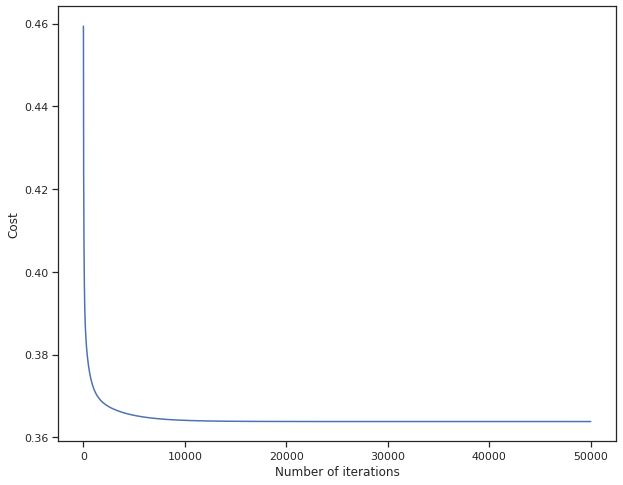

In [ ]:
#Model testing for Alpha = 0.01
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.01, 50000);
    return coeffMatrix;

linearModel_te3 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-07 

Cost Function converges at 2929 

Model Cost:  0.36388379214206723 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.05


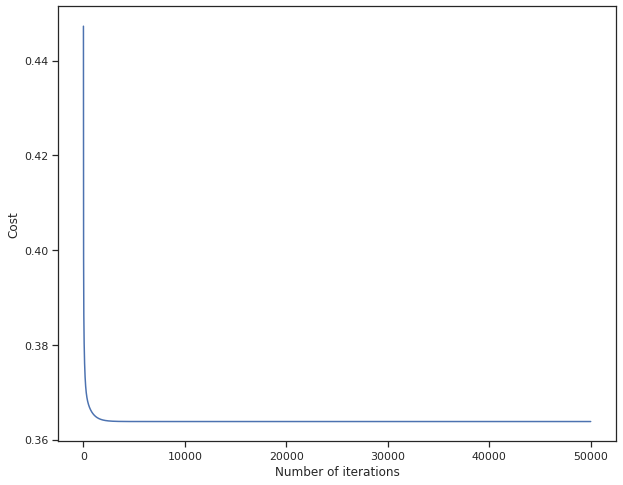

In [ ]:
#Model testing for Alpha = 0.05
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.05, 50000);
    return coeffMatrix;

linearModel_te4 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-07 

Cost Function converges at 15433 

Model Cost:  0.3644245736651507 

Model Coefficients: 
[[ 0.34343015 -0.45896255  0.30994488 -0.19627727 -0.11150617  0.28042189
   0.65959193 -0.51906104 -0.14271563  0.05036423 -0.07251721 -0.23465902
   0.00540541 -0.04680293  0.00525239  0.27124701]]
alpha: 0.005


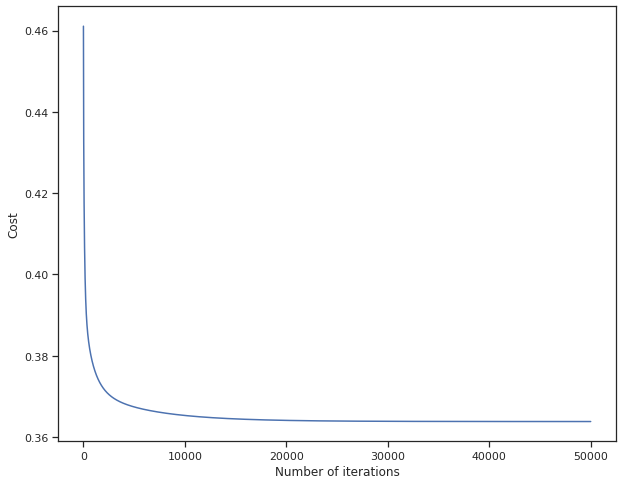

In [ ]:
#Model testing for Alpha = 0.005
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.005, 50000);
    return coeffMatrix;

linearModel_te5= developLinearModel(x1_test,y1_test);

Linear Regression using In-built Function:

In [ ]:
from sklearn import datasets, linear_model, metrics 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(x1_train, y1_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

Coefficients: 
 [[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 998 

Model Cost:  0.3915503298070015 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.2


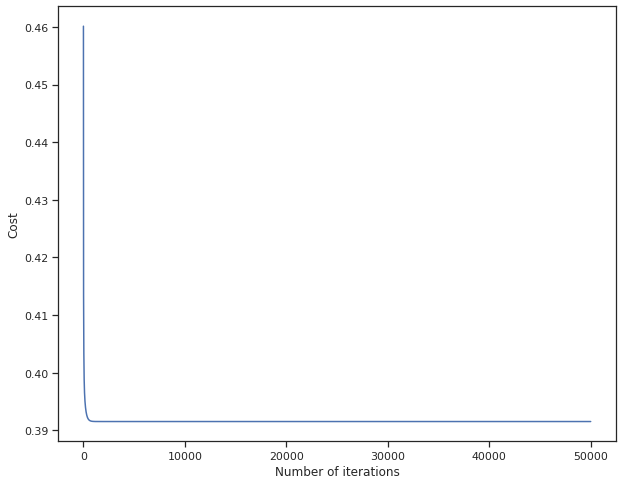

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-07 

Cost Function converges at 941 

Model Cost:  0.3638382784254004 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.2


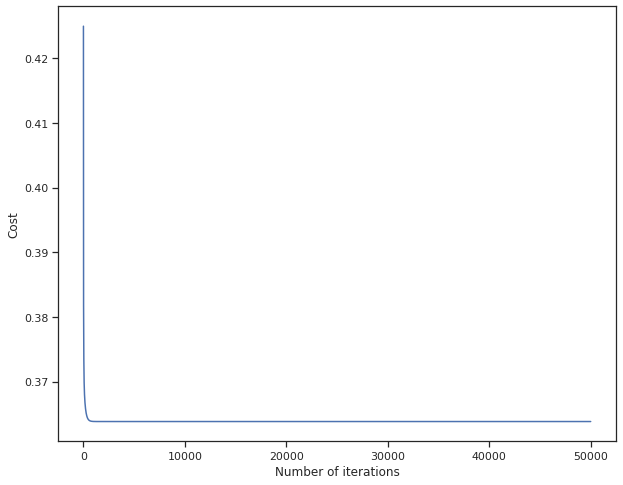

In [ ]:
#Linear regression Function for best Alpha value
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;

linearModel_trbe = developLinearModel(x1_train,y1_train)
linearModel_tebe = developLinearModel(x1_test,y1_test)

In [ ]:
predictedTarget_te1 = predict(x1_test, linearModel_te1);
predictedTarget_te2 = predict(x1_test, linearModel_te2);
predictedTarget_te3 = predict(x1_test, linearModel_te3);
predictedTarget_te4 = predict(x1_test, linearModel_te4);
predictedTarget_te5 = predict(x1_test, linearModel_te5);

predictedTarget_tr1 = predict(x1_train, linearModel_tr1);
predictedTarget_tr2 = predict(x1_train, linearModel_tr2);
predictedTarget_tr3 = predict(x1_train, linearModel_tr3);
predictedTarget_tr4 = predict(x1_train, linearModel_tr4);
predictedTarget_tr5 = predict(x1_train, linearModel_tr5);

In [ ]:
modelMSE_te1 = calculateMSE(y1_test, predictedTarget_te1);
modelMSE_te2 = calculateMSE(y1_test, predictedTarget_te2);
modelMSE_te3 = calculateMSE(y1_test, predictedTarget_te3);
modelMSE_te4= calculateMSE(y1_test, predictedTarget_te4);
modelMSE_te5 = calculateMSE(y1_test, predictedTarget_te5);

modelMSE_tr1 = calculateMSE(y1_train, predictedTarget_tr1);
modelMSE_tr2 = calculateMSE(y1_train, predictedTarget_tr2);
modelMSE_tr3 = calculateMSE(y1_train, predictedTarget_tr3);
modelMSE_tr4 = calculateMSE(y1_train, predictedTarget_tr4);
modelMSE_tr5 = calculateMSE(y1_train, predictedTarget_tr5);

In [ ]:
print('Model MSE Train1 for Alpha 0.2:', modelMSE_tr1,'\n');
print('Model MSE Train2 for Alpha 0.1:', modelMSE_tr2,'\n');
print('Model MSE Train3 for Alpha 0.01:', modelMSE_tr3,'\n');
print('Model MSE Train4 for Alpha 0.05:', modelMSE_tr4,'\n');
print('Model MSE Train5 for Alpha 0.005:', modelMSE_tr5,'\n');

Model MSE Train1 for Alpha 0.2: [0.78306872] 

Model MSE Train2 for Alpha 0.1: [0.78306872] 

Model MSE Train3 for Alpha 0.01: [0.78306873] 

Model MSE Train4 for Alpha 0.05: [0.78306872] 

Model MSE Train5 for Alpha 0.005: [0.78307543] 



In [ ]:
print('Model MSE Test for Alpha 0.2:', modelMSE_te1,'\n');
print('Model MSE Test for Alpha 0.1:', modelMSE_te2,'\n');
print('Model MSE Test for Alpha 0.01', modelMSE_te3,'\n');
print('Model MSE Test for Alpha 0.05:', modelMSE_te4,'\n');
print('Model MSE Test for Alpha 0.005:', modelMSE_te5,'\n');

Model MSE Test for Alpha 0.2: [0.72764619] 

Model MSE Test for Alpha 0.1: [0.72764619] 

Model MSE Test for Alpha 0.01 [0.7276462] 

Model MSE Test for Alpha 0.05: [0.72764619] 

Model MSE Test for Alpha 0.005: [0.72765026] 



In [ ]:
modelR2_tr1 = modelRSquared(y1_train, predictedTarget_tr1);
modelR2_tr2 = modelRSquared(y1_train, predictedTarget_tr2);
modelR2_tr3 = modelRSquared(y1_train, predictedTarget_tr3);
modelR2_tr4 = modelRSquared(y1_train, predictedTarget_tr4);
modelR2_tr5 = modelRSquared(y1_train, predictedTarget_tr5);

modelR2_te1 = modelRSquared(y1_test, predictedTarget_te1);
modelR2_te2 = modelRSquared(y1_test, predictedTarget_te2);
modelR2_te3 = modelRSquared(y1_test, predictedTarget_te3);
modelR2_te4 = modelRSquared(y1_test, predictedTarget_te4);
modelR2_te5 = modelRSquared(y1_test, predictedTarget_te5);

In [ ]:
print('Model R-Squared for Training: ','\n', modelR2_tr1,'\n', modelR2_tr2,'\n', 
      modelR2_tr3,'\n', modelR2_tr4,'\n',modelR2_tr5, '\n');

Model R-Squared for Training:  
 0.21693127691070846 
 0.21693127691070846 
 0.21693127419802627 
 0.21693127691070846 
 0.2169245734272247 



In [ ]:
print('Model R-Squared for Test: ','\n', modelR2_te1,'\n', modelR2_te2,'\n', 
      modelR2_te3,'\n', modelR2_te4,'\n',modelR2_te5, '\n');

Model R-Squared for Test:  
 0.21269284165484303 
 0.21269284165484292 
 0.21269284043956405 
 0.21269284165484303 
 0.21268844629375427 



Experiment__b: Classification

In [ ]:
feature_b=["T1","T2","T3","T4","T5","T6","RH_1","hour","RH_3","RH_5","RH_8",
          "RH_6","RH_out","Press_mm_hg","RH_2","lights"]
feature_1b=energy_a[feature_b]

In [ ]:
energy_a['Appliance_Class'] = np.where(energy_a['Appliances']>=60, 1, 0)
energy_a['Appliance_Class'] = energy_a['Appliance_Class'].astype('category')

#energy_a['Appliance_Class'] = energy_a['Appliance_Class'].astype(int)

In [ ]:
target_2=energy_a[App_class]
target_2.head()

Appliance_Class
date                               
2016-01-11 17:00:00               1
2016-01-11 17:10:00               1
2016-01-11 17:20:00               0
2016-01-11 17:30:00               0
2016-01-11 17:40:00               1

In [ ]:
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(feature_1b, target_2, test_size = 0.20, random_state = 0)

Gradeint Boosting Classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,1.25]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_l, y_train_l)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l, y_train_l)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l, y_test_l)))

Learning rate:  0.05
Accuracy score (training): 0.695
Accuracy score (test): 0.685
Learning rate:  0.075
Accuracy score (training): 0.731
Accuracy score (test): 0.722
Learning rate:  0.1
Accuracy score (training): 0.751
Accuracy score (test): 0.742
Learning rate:  0.25
Accuracy score (training): 0.764
Accuracy score (test): 0.752
Learning rate:  0.5
Accuracy score (training): 0.774
Accuracy score (test): 0.766
Learning rate:  0.75
Accuracy score (training): 0.776
Accuracy score (test): 0.763
Learning rate:  1
Accuracy score (training): 0.778
Accuracy score (test): 0.761
Learning rate:  1.25
Accuracy score (training): 0.783
Accuracy score (test): 0.760


In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,1.25]

for learning_rate in lr_list:
    gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf2.fit(X_train_l, y_train_l)
    predictions = gb_clf2.predict(X_test_l)
    print("Learning rate: ", learning_rate)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_l, predictions))
    print("Classification Report")
    print(classification_report(y_test_l, predictions))

Learning rate:  0.05
Confusion Matrix:
[[ 318 1197]
 [  46 2383]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.21      0.34      1515
           1       0.67      0.98      0.79      2429

    accuracy                           0.68      3944
   macro avg       0.77      0.60      0.57      3944
weighted avg       0.75      0.68      0.62      3944

Learning rate:  0.075
Confusion Matrix:
[[ 545  970]
 [ 127 2302]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.36      0.50      1515
           1       0.70      0.95      0.81      2429

    accuracy                           0.72      3944
   macro avg       0.76      0.65      0.65      3944
weighted avg       0.74      0.72      0.69      3944

Learning rate:  0.1
Confusion Matrix:
[[ 694  821]
 [ 196 2233]]
Classification Report
              precision    recall  f1-score   support

           0       0.78    

Experiment_2

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 0.001 

Cost Function converges at 9 

Model Cost:  0.4174972273474235 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.2


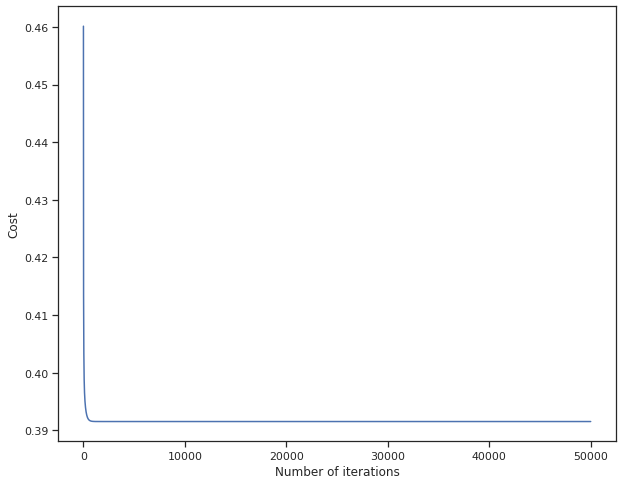

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 0.001 

Cost Function converges at 9 

Model Cost:  0.3856592020863569 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.2


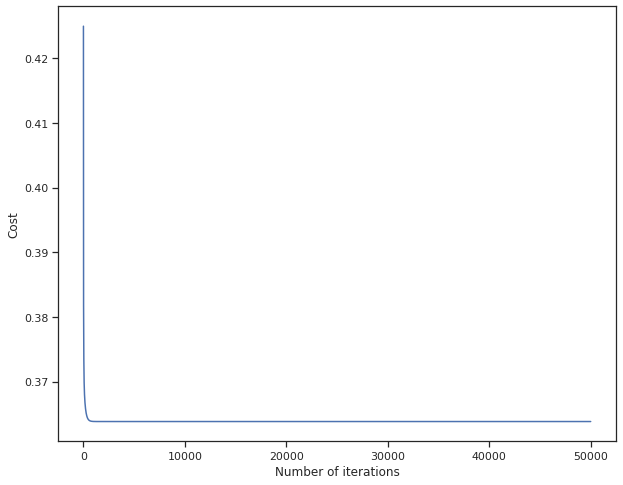

In [ ]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,50000);
    return coeffMatrix;
linearModel_tr11 = developLinearModel_1(x1_train,y1_train)
linearModel_te11 = developLinearModel_1(x1_test,y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 0.0001 

Cost Function converges at 68 

Model Cost:  0.3991466144699711 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.2


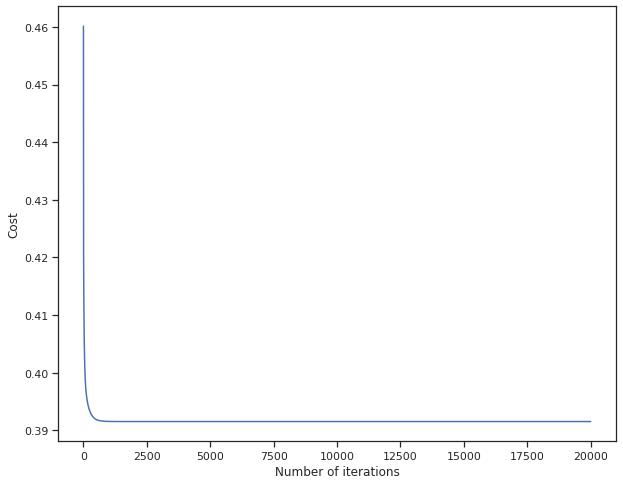

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 0.0001 

Cost Function converges at 58 

Model Cost:  0.37079330430945984 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.2


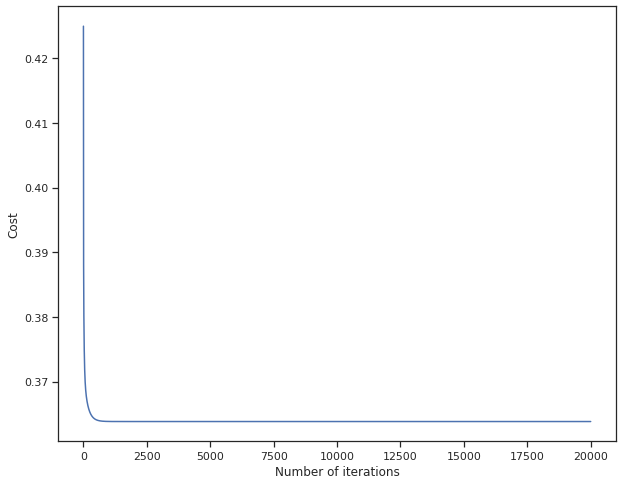

In [ ]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.0001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
linearModel_tr21 = developLinearModel_1(x1_train,y1_train)
linearModel_te21 = developLinearModel_1(x1_test,y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-05 

Cost Function converges at 274 

Model Cost:  0.3930833870225596 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.2


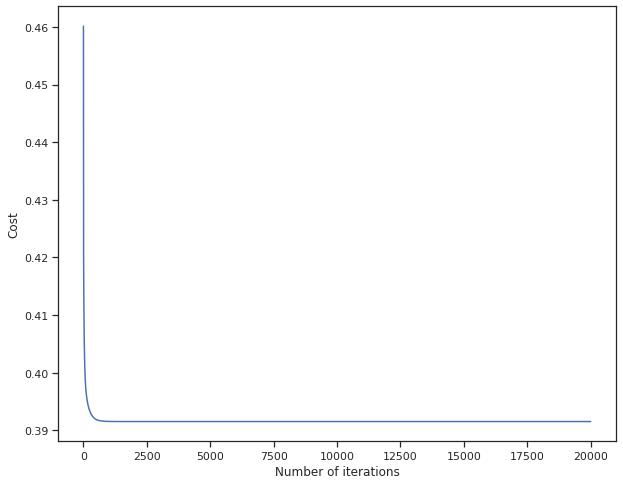

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-05 

Cost Function converges at 250 

Model Cost:  0.3653004974322989 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.2


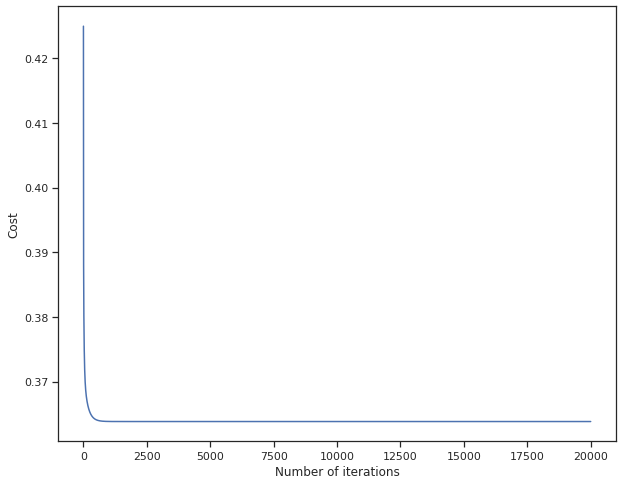

In [ ]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.00001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
linearModel_tr31 = developLinearModel_1(x1_train,y1_train)
linearModel_te31 = developLinearModel_1(x1_test,y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-06 

Cost Function converges at 633 

Model Cost:  0.3916926907746537 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.2


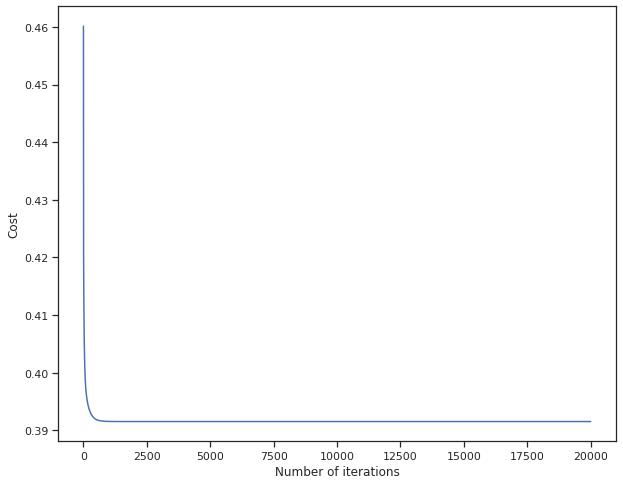

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-06 

Cost Function converges at 592 

Model Cost:  0.3639746618537453 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.2


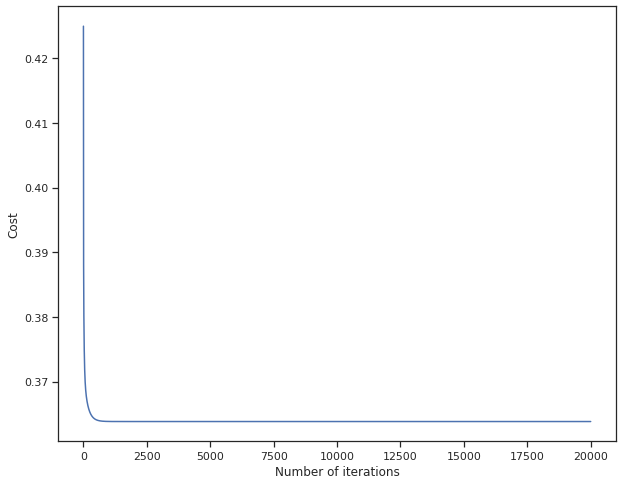

In [ ]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.000001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
linearModel_tr41 = developLinearModel_1(x1_train,y1_train)
linearModel_te41 = developLinearModel_1(x1_test,y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 998 

Model Cost:  0.3915503298070015 

Model Coefficients: 
[[ 0.31475457 -0.45527275  0.36473878 -0.20422269 -0.09200132  0.29578117
   0.78138302 -0.61675319 -0.17220266  0.04142052 -0.02864974 -0.29513445
   0.03476882 -0.03131108  0.02511575  0.27005184]]
alpha: 0.2


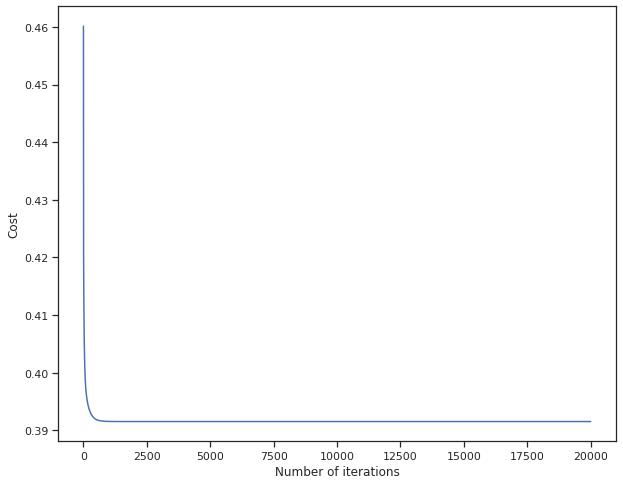

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-07 

Cost Function converges at 941 

Model Cost:  0.3638382784254004 

Model Coefficients: 
[[ 0.34919093 -0.46792242  0.30897164 -0.19584169 -0.11074217  0.28661316
   0.66477765 -0.52562024 -0.14148345  0.05044798 -0.0724335  -0.23815424
   0.00864929 -0.04661457  0.00541071  0.27098314]]
alpha: 0.2


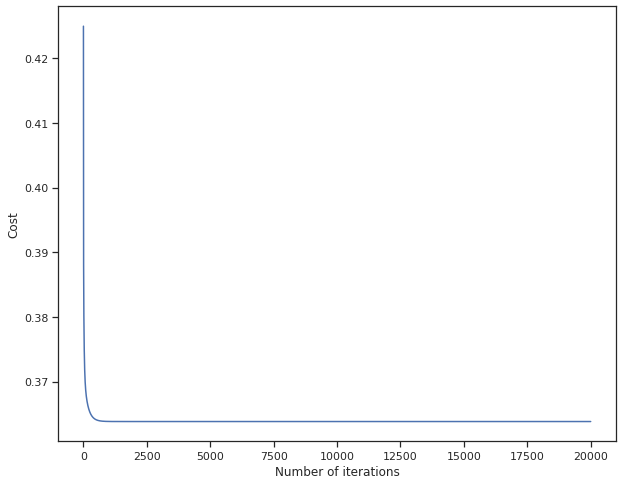

In [ ]:
#Best Model
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.0000001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
linearModel_tr51 = developLinearModel_1(x1_train,y1_train)
linearModel_te51 = developLinearModel_1(x1_test,y1_test)

In [ ]:
predictedTarget_te11 = predict(x1_test, linearModel_te11);
predictedTarget_te21 = predict(x1_test, linearModel_te21);
predictedTarget_te31 = predict(x1_test, linearModel_te31);
predictedTarget_te41 = predict(x1_test, linearModel_te41);
predictedTarget_te51 = predict(x1_test, linearModel_te51);

predictedTarget_tr11 = predict(x1_train, linearModel_tr11);
predictedTarget_tr21 = predict(x1_train, linearModel_tr21);
predictedTarget_tr31 = predict(x1_train, linearModel_tr31);
predictedTarget_tr41 = predict(x1_train, linearModel_tr41);
predictedTarget_tr51 = predict(x1_train, linearModel_tr51);

In [ ]:
modelMSE_te11 = calculateMSE(y1_test, predictedTarget_te11);
modelMSE_te21 = calculateMSE(y1_test, predictedTarget_te21);
modelMSE_te31 = calculateMSE(y1_test, predictedTarget_te31);
modelMSE_te41= calculateMSE(y1_test, predictedTarget_te41);
modelMSE_te51 = calculateMSE(y1_test, predictedTarget_te51);

modelMSE_tr11 = calculateMSE(y1_train, predictedTarget_tr11);
modelMSE_tr21 = calculateMSE(y1_train, predictedTarget_tr21);
modelMSE_tr31 = calculateMSE(y1_train, predictedTarget_tr31);
modelMSE_tr41 = calculateMSE(y1_train, predictedTarget_tr41);
modelMSE_tr51 = calculateMSE(y1_train, predictedTarget_tr51);

In [ ]:
print('Model MSE Train1 for Threshold 0.001:', modelMSE_tr11,'\n');
print('Model MSE Train2 for Threshold 0.0001:', modelMSE_tr21,'\n');
print('Model MSE Train3 for Threshold 0.00001:', modelMSE_tr31,'\n');
print('Model MSE Train4 for Threshold 0.000001:', modelMSE_tr41,'\n');
print('Model MSE Train5 for Threshold 0.0000001:', modelMSE_tr51,'\n');

Model MSE Train1 for Threshold 0.001: [0.78306872] 

Model MSE Train2 for Threshold 0.0001: [0.78306872] 

Model MSE Train3 for Threshold 0.00001: [0.78306872] 

Model MSE Train4 for Threshold 0.000001: [0.78306872] 

Model MSE Train5 for Threshold 0.0000001: [0.78306872] 



In [ ]:
print('Model MSE Test for Threshold 0.001:', modelMSE_te11,'\n');
print('Model MSE Test for Threshold 0.0001:', modelMSE_te21,'\n');
print('Model MSE Test for Threshold 0.00001:', modelMSE_te31,'\n');
print('Model MSE Test for Threshold 0.000001:', modelMSE_te41,'\n');
print('Model MSE Test for Threshold 0.0000001:', modelMSE_te51,'\n');

Model MSE Test for Threshold 0.001: [0.72764619] 

Model MSE Test for Threshold 0.0001: [0.72764619] 

Model MSE Test for Threshold 0.00001: [0.72764619] 

Model MSE Test for Threshold 0.000001: [0.72764619] 

Model MSE Test for Threshold 0.0000001: [0.72764619] 



In [ ]:
modelR2_tr11 = modelRSquared(y1_train, predictedTarget_tr11);
modelR2_tr21 = modelRSquared(y1_train, predictedTarget_tr21);
modelR2_tr31 = modelRSquared(y1_train, predictedTarget_tr31);
modelR2_tr41 = modelRSquared(y1_train, predictedTarget_tr41);
modelR2_tr51 = modelRSquared(y1_train, predictedTarget_tr51);

modelR2_te11 = modelRSquared(y1_test, predictedTarget_te11);
modelR2_te21 = modelRSquared(y1_test, predictedTarget_te21);
modelR2_te31 = modelRSquared(y1_test, predictedTarget_te31);
modelR2_te41 = modelRSquared(y1_test, predictedTarget_te41);
modelR2_te51 = modelRSquared(y1_test, predictedTarget_te51);

In [ ]:
print('Model R-Squared for Training: ','\n', modelR2_tr11,'\n', modelR2_tr21,'\n', 
      modelR2_tr31,'\n', modelR2_tr41,'\n',modelR2_tr51, '\n');

Model R-Squared for Training:  
 0.21693127691070846 
 0.21693127691070846 
 0.21693127691070846 
 0.21693127691070846 
 0.21693127691070846 



In [ ]:
print('Model R-Squared for Test: ','\n', modelR2_te11,'\n', modelR2_te21,'\n', 
      modelR2_te31,'\n', modelR2_te41,'\n',modelR2_te51, '\n');

Model R-Squared for Test:  
 0.21269284165484303 
 0.21269284165484303 
 0.21269284165484303 
 0.21269284165484303 
 0.21269284165484303 



Experiment_3

In [ ]:
feature_c=["T1","T2",'T5','T7','T8' ,'RH_2','RH_4','RH_5','Windspeed','Tdewpoint']
feature_3=energy_a[feature_c]
target_3=energy_a[appliance_1]

In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(feature_3, target_3, test_size = 0.2, random_state = 0)

In [ ]:
x3_train=scaler.fit_transform(x3_train)
x3_test=scaler.transform(x3_test)
y3_train = scaler.fit_transform(y3_train)
y3_test=scaler.transform(y3_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 432 

Model Cost:  0.4548303315504445 

Model Coefficients: 
[[-0.18001314  0.53288624 -0.1400196  -0.21313744  0.34176265  0.1723917
  -0.17526675  0.02858152  0.11207817 -0.10134775]]
alpha: 0.2


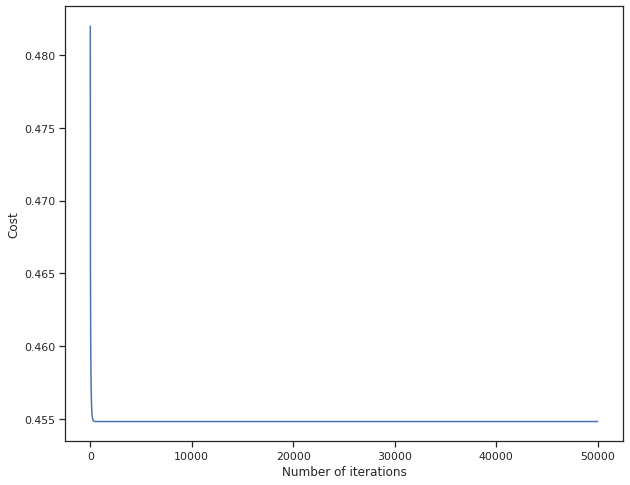

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4628228862926715 

Threshold level 1e-07 

Cost Function converges at 443 

Model Cost:  0.42215518743439145 

Model Coefficients: 
[[-0.10244718  0.48564375 -0.11859251 -0.28803536  0.32132427  0.19923595
  -0.25944123  0.03346105  0.11178559 -0.03344547]]
alpha: 0.2


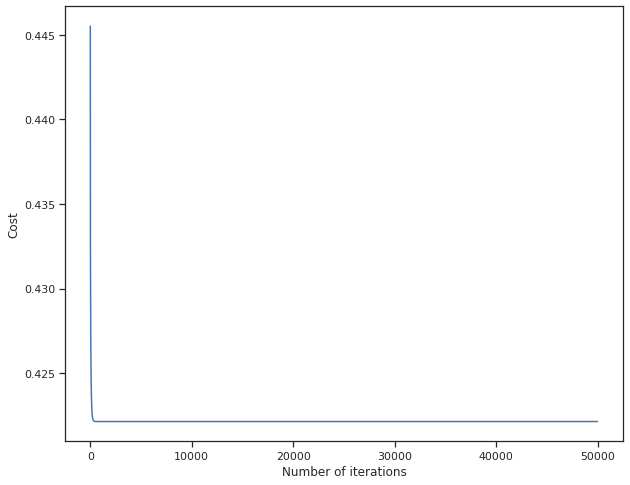

In [ ]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;
linearModel_31 = developLinearModel(x3_train,y3_train)
linearModel_32 = developLinearModel(x3_test,y3_test)

In [ ]:
predictedTarget_31 = predict(x3_test, linearModel_31);

modelMSE_31 = calculateMSE(y3_test, predictedTarget_31);

print('Model MSE Train:', modelMSE_31,'\n');

modelR2_31 = modelRSquared(y3_test, predictedTarget_31);
print('Model R-Squared for Train: ', modelR2_31,);

Model MSE Train: [0.84786555] 

Model R-Squared for Train:  0.0826164977110071


In [ ]:
predictedTarget_32 = predict(x3_test, linearModel_32);

modelMSE_32 = calculateMSE(y3_test, predictedTarget_32);

print('Model MSE Text:', modelMSE_32,'\n');

modelR2_32 = modelRSquared(y3_test, predictedTarget_31);
print('Model R-Squared for Test: ', modelR2_32,);

Model MSE Text: [0.84429808] 

Model R-Squared for Test:  0.0826164977110071


In [ ]:
from sklearn.model_selection import train_test_split
X_train_l3, X_test_l3, y_train_l3, y_test_l3 = train_test_split(feature_3, target_2, test_size = 0.20, random_state = 0)
gb_clf = GradientBoostingClassifier( learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_l3, y_train_l3)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l3, y_train_l3)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l3, y_test_l3)))
predictions = gb_clf.predict(X_test_l3)
print("Confusion Matrix:")
print(confusion_matrix(y_test_l3, predictions))
print("Classification Report")
print(classification_report(y_test_l3, predictions))

Learning rate:  1.25
Accuracy score (training): 0.781
Accuracy score (test): 0.731
Confusion Matrix:
[[ 895  620]
 [ 442 1987]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1515
           1       0.76      0.82      0.79      2429

    accuracy                           0.73      3944
   macro avg       0.72      0.70      0.71      3944
weighted avg       0.73      0.73      0.73      3944



Experiment_4

In [ ]:
energy_a['HL'] = energy_a.hour*energy_a.lights

In [ ]:
feature_d=["T2","HL",'T3','T6', 'RH_3','lights','hour','T_out',"RH_out",'RH_8']
feature_4=energy_a[feature_d]
target_4=energy_a[appliance_1]

In [ ]:
feature_4.head()

T2   HL     T3        T6       RH_3  lights  hour  \
date                                                                       
2016-01-11 17:00:00  19.2  510  19.79  7.026667  44.730000      30    17   
2016-01-11 17:10:00  19.2  510  19.79  6.833333  44.790000      30    17   
2016-01-11 17:20:00  19.2  510  19.79  6.560000  44.933333      30    17   
2016-01-11 17:30:00  19.2  680  19.79  6.433333  45.000000      40    17   
2016-01-11 17:40:00  19.2  680  19.79  6.366667  45.000000      40    17   

                        T_out  RH_out       RH_8  
date                                              
2016-01-11 17:00:00  6.600000    92.0  48.900000  
2016-01-11 17:10:00  6.483333    92.0  48.863333  
2016-01-11 17:20:00  6.366667    92.0  48.730000  
2016-01-11 17:30:00  6.250000    92.0  48.590000  
2016-01-11 17:40:00  6.133333    92.0  48.590000

In [ ]:
x4_train, x4_test, y4_train, y4_test = train_test_split(feature_4, target_4, test_size = 0.2, random_state = 0)

In [ ]:
x4_train=scaler.fit_transform(x4_train)
x4_test=scaler.transform(x4_test)
y4_train = scaler.fit_transform(y4_train)
y4_test=scaler.transform(y4_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 

Threshold level 1e-07 

Cost Function converges at 781 

Model Cost:  0.3864064340584661 

Model Coefficients: 
[[-0.07507326 -0.13838136  0.23903902  0.55649492  0.26603711  0.32806313
   0.23121164 -0.5932085  -0.13670329 -0.23855122]]
alpha: 0.2


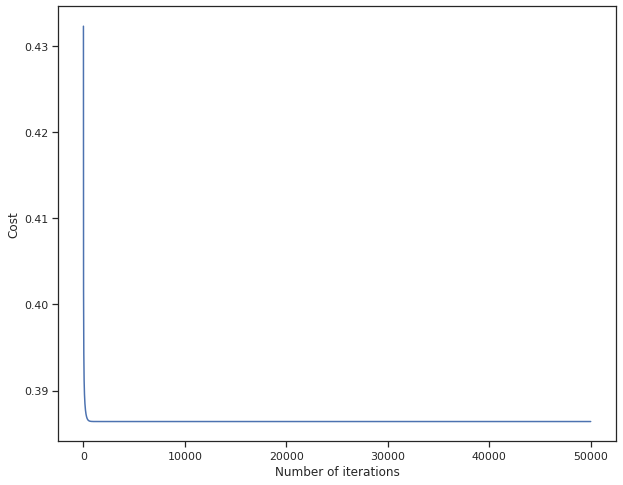

In [ ]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;
linearModel_4 = developLinearModel(x4_train,y4_train)

Evaluation Metrics

In [ ]:
predictedTarget_41 = predict(x4_train, linearModel_4);

modelMSE_41 = calculateMSE(y4_train, predictedTarget_41);

print('Model MSE Train:', modelMSE_41,'\n');

modelR2_41 = modelRSquared(y4_train, predictedTarget_41);
print('Model R-Squared for Test: ', modelR2_41);

Model MSE Train: [0.77278781] 

Model R-Squared for Test:  0.22721219442943164


In [ ]:
predictedTarget_4 = predict(x4_test, linearModel_4);

modelMSE_4 = calculateMSE(y4_test, predictedTarget_4);

print('Model MSE:', modelMSE_4,'\n');

modelR2_4 = modelRSquared(y4_test, predictedTarget_4);
print('Model R-Squared for Test: ', modelR2_4);

Model MSE: [0.72453145] 

Model R-Squared for Test:  0.21606296609016418


In [ ]:
from sklearn.model_selection import train_test_split
X_train_l4, X_test_l4, y_train_l4, y_test_l4 = train_test_split(feature_4, target_2, test_size = 0.20, random_state = 0)
gb_clf = GradientBoostingClassifier( learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_l4, y_train_l4)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l4, y_train_l4)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l4, y_test_l4)))
predictions = gb_clf.predict(X_test_l4)
print("Confusion Matrix:")
print(confusion_matrix(y_test_l4, predictions))
print("Classification Report")
print(classification_report(y_test_l4, predictions))

Learning rate:  1.25
Accuracy score (training): 0.808
Accuracy score (test): 0.775
Confusion Matrix:
[[1043  472]
 [ 415 2014]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1515
           1       0.81      0.83      0.82      2429

    accuracy                           0.78      3944
   macro avg       0.76      0.76      0.76      3944
weighted avg       0.77      0.78      0.77      3944



4b

In [ ]:
feature_e=temperature+humidity+weather+light+hour+random
feature_4b=energy_a[feature_e]
target_4b=energy_a[appliance_1]

In [ ]:
x4b_train, x4b_test, y4b_train, y4b_test = train_test_split(feature_4b, target_4b, test_size = 0.2, random_state = 0)

In [ ]:
x4b_train=scaler.fit_transform(x4b_train)
x4b_test=scaler.transform(x4b_test)
y4b_train = scaler.fit_transform(y4b_train)
y4b_test=scaler.transform(y4b_test)

In [ ]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;
linearModel_4b = developLinearModel(x4b_train,y4b_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]

Initial Cost:  0.49999999999999994 



In [ ]:
predictedTarget_4b1 = predict(x4b_train, linearModel_4b);

modelMSE_4b1 = calculateMSE(y4b_train, predictedTarget_4b1);

print('Model MSE Train:', modelMSE_4b1,'\n');

modelR2_4b1 = modelRSquared(y4b_train, predictedTarget_4b1);
print('Model R-Squared for Train: ', modelR2_4b1);

In [ ]:
predictedTarget_4b = predict(x4b_test, linearModel_4b);

modelMSE_4b = calculateMSE(y4b_test, predictedTarget_4b);

print('Model MSE:', modelMSE_4b,'\n');

modelR2_4b = modelRSquared(y4b_test, predictedTarget_4b);
print('Model R-Squared for Test: ', modelR2_4b,);

In [ ]:
from sklearn.model_selection import train_test_split
X_train_l4b, X_test_l4b, y_train_l4b, y_test_l4b = train_test_split(feature_4b, target_2, test_size = 0.20, random_state = 0)
gb_clf = GradientBoostingClassifier( learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_l4b, y_train_l4b)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l4b, y_train_l4b)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l4b, y_test_l4b)))
predictions = gb_clf.predict(X_test_l4b)
print("Confusion Matrix:")
print(confusion_matrix(y_test_l4b, predictions))
print("Classification Report")
print(classification_report(y_test_l4b, predictions))